# Cardiovascular Disease Classification using Machine Learning

#### Data:

Heart Disease Dataset from UCI Machine Learning Repository
#### Problem: 

Classifying cardiovascular disease cases using predictive multiple classification methods then determining the best model with highest accuracy and prediction rate. 


#### Background Research!

Most common type of heart disease in the U.S is coronary artery disease (CAD). Symptoms include heart attack, chest pain or discomfort, fluttering feelings in the chest, and heart failure (shortness of breath, fatigue)
Risk factors for heart disease includes high blood pressure, high blood cholesterol, and smoking
1 person dies every 37 seconds in the U.S from cardiovascular disease
1 in every 4 deaths is caused by cardiovascular disease, about 647,000 Americans
Heart disease takes up to 23.4% for all cause of death in the U.S in 2015
Men are likely to die from heart disease than women


In [168]:

# Heart Disease Dataset


# Importing packages
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


# Importing the dataset
df = pd.read_csv("heart.csv")

EDA

In [169]:
#Explore Data
print(df.shape)
df.info()
df.head()

(303, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### All column names in the dataset are abbreviated, for better understanding of the data we defined the column names with appropriate descriptions of the attribute. All the datatypes were integer, even for categorical variables, so we changed the datatypes for the categorical variables to the appropriate datatype. Additionally, we created dummies for object variables to enhance model’s performance.

In [170]:
# Change column names
df.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure',
              'cholesterol', 'fasting_blood_sugar', 'rest_ecg',
              'max_heart_rate_achieved','exercise_induced_angina',
              'st_depression', 'st_slope', 'num_major_vessels',
              'thalassemia', 'target']

In [171]:
# Change values for categorical variables
df['sex'][df['sex'] == 0] = 'female'
df['sex'][df['sex'] == 1] = 'male'

df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
df['chest_pain_type'][df['chest_pain_type'] == 2] = 'atypical angina'
df['chest_pain_type'][df['chest_pain_type'] == 3] = 'non-anginal pain'
df['chest_pain_type'][df['chest_pain_type'] == 4] = 'asymptomatic'

df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

df['rest_ecg'][df['rest_ecg'] == 0] = 'normal'
df['rest_ecg'][df['rest_ecg'] == 1] = 'ST-T wave abnormality'
df['rest_ecg'][df['rest_ecg'] == 2] = 'left ventricular hypertrophy'

df['exercise_induced_angina'][df['exercise_induced_angina'] == 0] = 'no'
df['exercise_induced_angina'][df['exercise_induced_angina'] == 1] = 'yes'

df['st_slope'][df['st_slope'] == 1] = 'upsloping'
df['st_slope'][df['st_slope'] == 2] = 'flat'
df['st_slope'][df['st_slope'] == 3] = 'downsloping'

df['thalassemia'][df['thalassemia'] == 1] = 'normal'
df['thalassemia'][df['thalassemia'] == 2] = 'fixed defect'
df['thalassemia'][df['thalassemia'] == 3] = 'reversable defect'


<ipython-input-171-9f12755a6fac>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['sex'][df['sex'] == 0] = 'female'
<ipython-input-171-9f12755a6fac>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['chest_pain_type'][df['chest_pain_type'] == 1] = 'typical angina'
<ipython-input-171-9f12755a6fac>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fasting_blood_sugar'][df['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
<ipy

In [172]:
df.dtypes

age                          int64
sex                         object
chest_pain_type             object
resting_blood_pressure       int64
cholesterol                  int64
fasting_blood_sugar         object
rest_ecg                    object
max_heart_rate_achieved      int64
exercise_induced_angina     object
st_depression              float64
st_slope                    object
num_major_vessels            int64
thalassemia                 object
target                       int64
dtype: object

In [173]:
# creating dummies for categorical variables
df = pd.get_dummies(df, drop_first=True)
df.head()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,target,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
0,63,145,233,150,2.3,0,1,1,0,1,0,0,0,1,0,0,0,0,1,0
1,37,130,250,187,3.5,0,1,1,1,0,0,1,0,0,0,0,0,1,0,0
2,41,130,204,172,1.4,0,1,0,0,0,1,1,0,1,0,1,0,1,0,0
3,56,120,236,178,0.8,0,1,1,0,0,1,1,0,0,0,1,0,1,0,0
4,57,120,354,163,0.6,0,1,0,0,0,0,1,0,0,1,1,0,1,0,0


In the dataset, we have the variable target, which indicates whether the patient has heart disease or not. This is our dependent variable; therefore, we are going to take a closer look at the distribution of it. There are 165 cases that have heart disease, which is 54% of the dataset; and 138 cases that do not have heart disease, which is 46% of the dataset. The distribution between people who have heart disease and people who do not have heart disease in this dataset is pretty even.

Text(0.5, 1.0, 'Age Distribution')

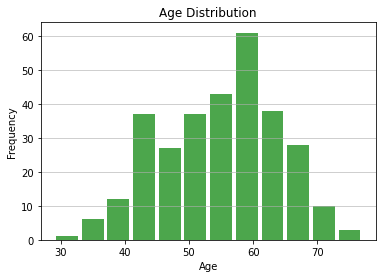

In [174]:
#Histogram based on Age
n, bins, patches = plt.hist(x=[df['age']], bins='auto', color='Green',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')

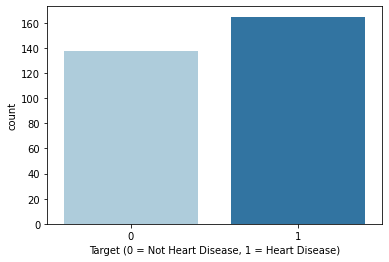

Number of people have heart disease is  165  or  54 %
Number of people do not have heart disease is  138  or  46 %


In [175]:
# count of heart disease cases
sns.countplot(x="target", data=df, palette='Paired')
plt.xlabel("Target (0 = Not Heart Disease, 1 = Heart Disease)")
plt.show()

count_hd = len(df[df['target']==1])
count_not = len(df[df['target']==0])
pct_hd = count_hd/(count_hd+count_not)
print("Number of people have heart disease is ", count_hd, " or ", round(pct_hd*100), "%" )
pct_not = count_not/(count_hd+count_not)
print("Number of people do not have heart disease is ", count_not, " or ", round(pct_not*100), "%" )

There are 100 females and 200 males in this dataset. Recalling from the background research, the information we gathered from the CDC did say that more men have heart disease than women

In [176]:
df.groupby('target').mean()

,age,resting_blood_pressure,cholesterol,max_heart_rate_achieved,st_depression,num_major_vessels,sex_male,chest_pain_type_atypical angina,chest_pain_type_non-anginal pain,chest_pain_type_typical angina,fasting_blood_sugar_lower than 120mg/ml,rest_ecg_left ventricular hypertrophy,rest_ecg_normal,exercise_induced_angina_yes,st_slope_flat,st_slope_upsloping,thalassemia_fixed defect,thalassemia_normal,thalassemia_reversable defect
target,,,,,,,,,,,,,,,,,,,
0,56.601449,134.398551,251.086957,139.101449,1.585507,1.166667,0.826087,0.130435,0.050725,0.065217,0.840580,0.021739,0.572464,0.550725,0.253623,0.65942,0.260870,0.086957,0.644928
1,52.496970,129.303030,242.230303,158.466667,0.583030,0.363636,0.563636,0.418182,0.096970,0.248485,0.860606,0.006061,0.412121,0.139394,0.648485,0.29697,0.787879,0.036364,0.169697


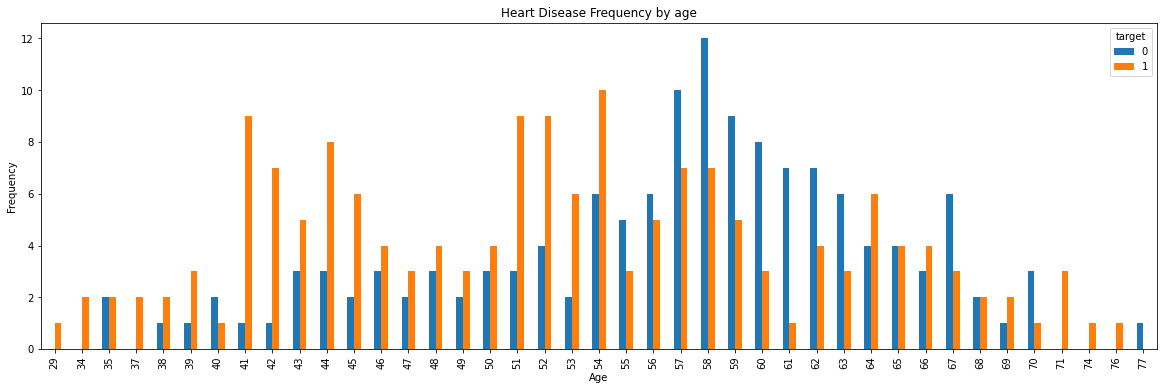

In [177]:
# frequency by age
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency by age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

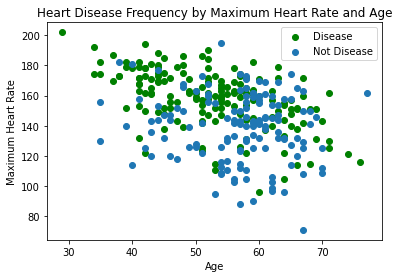

In [178]:
# scatter plot by age and heart rate
plt.scatter(x=df.age[df.target==1], y=df.max_heart_rate_achieved[(df.target==1)], c="green")
plt.scatter(x=df.age[df.target==0], y=df.max_heart_rate_achieved[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.title('Heart Disease Frequency by Maximum Heart Rate and Age')
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

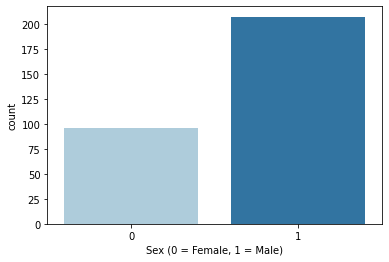

In [179]:
sns.countplot(x='sex_male', data=df, palette='Paired')
plt.xlabel("Sex (0 = Female, 1 = Male)")
plt.show()

Splitting Data

In [180]:
# Split X and y
X = df.drop(['target'], axis = 1)
y = df.target.values

In [181]:
# Normalizing data
X = (X -np.min(X))/(np.max(X)-np.min(X)).values
# Creating training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [182]:
#transpose matrices
X_train = X_train.T
y_train = y_train.T
X_test = X_test.T
y_test = y_test.T

In [183]:
# accuracy scores
accuracies = {}

k-NN Model

In [184]:
# k-NN
from sklearn.neighbors import KNeighborsClassifier
# Build k-NN model
train_accuracy = []
test_accuracy = []
k = range(1, 20)

for n_neighbors in k:
    # build the model
    knn = KNeighborsClassifier(n_neighbors = n_neighbors)
    knn.fit(X_train.T, y_train.T)

print("Best k value is: ",n_neighbors)
acc_knn = round(knn.score(X_train.T, y_train.T)*100,2)
acc_test_knn = round(knn.score(X_test.T, y_test.T)*100,2)
accuracies['KNN'] = acc_test_knn
print("The accuracy score is: {:.2f}%".format(acc_test_knn))

Best k value is:  19
The accuracy score is: 80.26%


Gaussian Naive Bayes

In [185]:
# Gaussian NB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
# default var_smoothing = default = 1e-9
gnb.fit(X_train.T, y_train.T)

acc_gnb = round(gnb.score(X_train.T, y_train.T)*100,2)
acc_test_gnb = round(gnb.score(X_test.T, y_test.T)*100,2)
accuracies['Gaussian Naive Bayes'] = acc_test_gnb
print("The accuracy score is: {:.2f}%".format(acc_test_gnb))

The accuracy score is: 84.21%


Logistic Regression

In [186]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train.T,y_train.T)

acc_lr = round(lr.score(X_train.T, y_train.T)*100,2)
acc_test_lr = round(lr.score(X_test.T, y_test.T)*100,2)
accuracies['Logistic Regression'] = acc_test_lr
print("The accuracy score is: {:.2f}%".format(acc_test_lr))

The accuracy score is: 82.89%


Decision Trees

In [187]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train.T, y_train.T)

acc_dtc = round(dtc.score(X_train.T, y_train.T)*100,2)
acc_test_dtc = round(dtc.score(X_test.T, y_test.T)*100,2)
accuracies['Decision Tree'] = acc_test_dtc
print("The accuracy score is: {:.2f}%".format(acc_test_dtc))

The accuracy score is: 75.00%


Random Forest

In [188]:
# Random Forest Classification
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train.T, y_train.T)

acc_rf = round(rf.score(X_train.T, y_train.T)*100,2)
acc_test_rf = round(rf.score(X_test.T, y_test.T)*100,2)
accuracies['Random Forest'] = acc_test_rf
print("The accuracy score is: {:.2f}%".format(acc_test_rf))

The accuracy score is: 82.89%


Bagging Classifier

In [189]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(X_train.T, y_train.T)

acc_bc = round(bc.score(X_train.T, y_train.T)*100,2)
acc_test_bc = round(bc.score(X_test.T, y_test.T)*100,2)
accuracies['Random Forest'] = acc_test_bc
print("The accuracy score is: {:.2f}%".format(acc_test_bc))

The accuracy score is: 75.00%


Linear Support Vector Classification

In [190]:
# Linear SVM
from sklearn.svm import LinearSVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

l_svm = make_pipeline(StandardScaler(), LinearSVC(random_state=0, tol=1e-5))
l_svm.fit(X_train.T, y_train.T)

acc_lsvm = round(l_svm.score(X_train.T, y_train.T)*100,2)
acc_test_lsvm = round(l_svm.score(X_test.T, y_test.T)*100,2)
accuracies['SVM'] = acc_test_lsvm
print("The accuracy score is: {:.2f}%".format(acc_test_lsvm))

The accuracy score is: 82.89%


/Users/katpham/Library/Python/3.8/lib/python/site-packages/sklearn/svm/_base.py:946: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


C-Support Vector Classification

In [191]:
# SVC
from sklearn.svm import SVC
svm = SVC(kernel = 'rbf', random_state = 0)
svm.fit(X_train.T, y_train.T)

acc_svm = round(svm.score(X_train.T, y_train.T)*100,2)
acc_test_svm = round(l_svm.score(X_test.T, y_test.T)*100,2)
accuracies['SVM'] = acc_test_svm
print("The accuracy score is: {:.2f}%".format(acc_test_svm))

The accuracy score is: 82.89%


Ada Boost

In [192]:
# Ada Boost model
from sklearn.ensemble import AdaBoostClassifier
ada_boost = AdaBoostClassifier(n_estimators=300, learning_rate=0.01)
ada_boost.fit(X_train.T, y_train.T)

acc_ada = round(ada_boost.score(X_train.T, y_train.T)*100,2)
acc_test_ada = round(ada_boost.score(X_test.T, y_test.T)*100,2)
accuracies['Ada Boost'] = acc_test_ada
print("The accuracy score is: {:.2f}%".format(acc_test_ada))

The accuracy score is: 81.58%


Models Evaluation

In [193]:
# Predicted values
y_head_knn = knn.predict(X_test.T)
y_head_gnb = gnb.predict(X_test.T)
y_head_lr = lr.predict(X_test.T)
y_head_dtc = dtc.predict(X_test.T)
y_head_rf = rf.predict(X_test.T)
y_head_bc = bc.predict(X_test.T)
y_head_lsvm = l_svm.predict(X_test.T)
y_head_svm = svm.predict(X_test.T)
y_head_ada = ada_boost.predict(X_test.T)


In [194]:
from sklearn.metrics import confusion_matrix
cm_knn = confusion_matrix(y_test,y_head_knn)
cm_gnb = confusion_matrix(y_test, y_head_gnb)
cm_lr = confusion_matrix(y_test,y_head_lr)
cm_dtc = confusion_matrix(y_test,y_head_dtc)
cm_rf = confusion_matrix(y_test,y_head_rf)
cm_bc = confusion_matrix(y_test, y_head_bc)
cm_lsvm = confusion_matrix(y_test, y_head_lsvm)
cm_svm = confusion_matrix(y_test, y_head_svm)
cm_ada = confusion_matrix(y_test, y_head_ada)

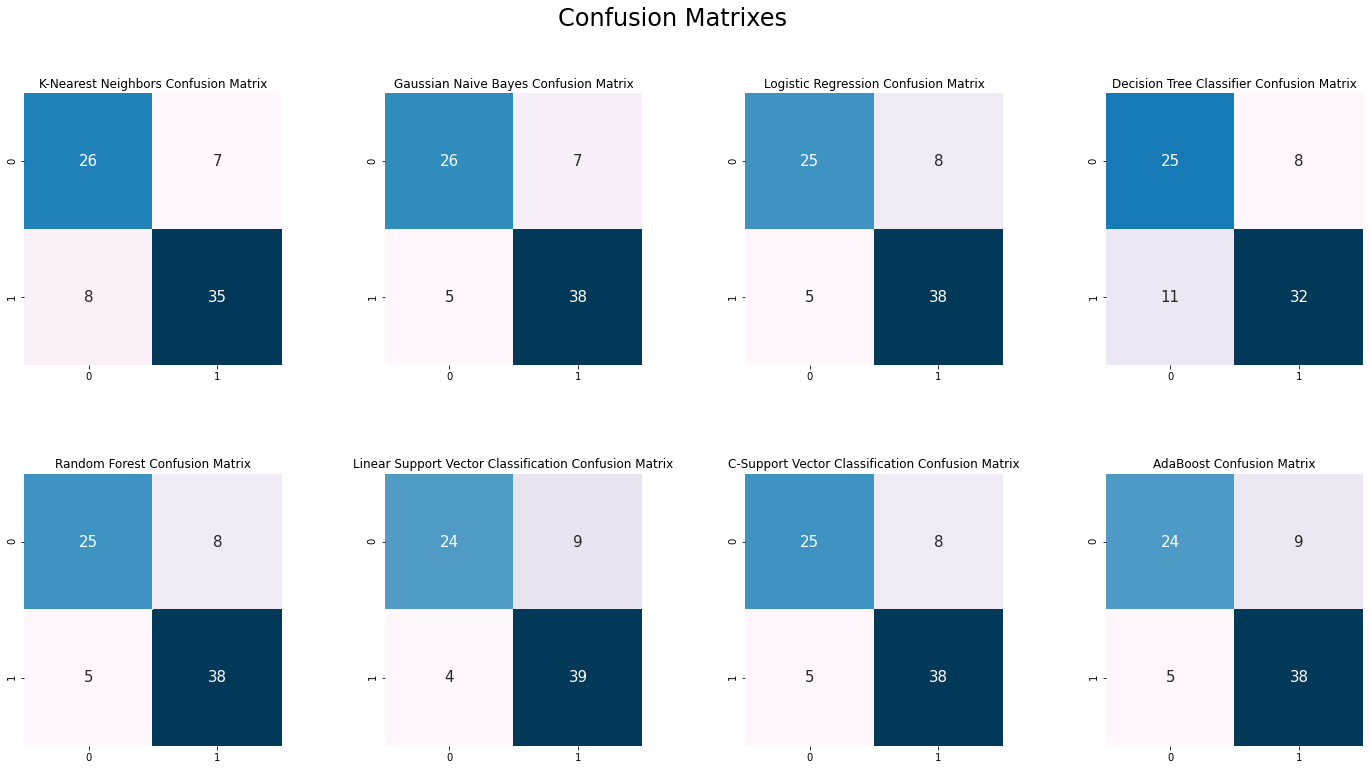

In [195]:
# Confusion matrix visualization
plt.figure(figsize=(24,12))
plt.suptitle("Confusion Matrixes",fontsize=24)
plt.subplots_adjust(wspace = 0.4, hspace= 0.4)

plt.subplot(2,4,1)
plt.title("K-Nearest Neighbors Confusion Matrix")
sns.heatmap(cm_knn,annot=True,cmap="PuBu",fmt="d",cbar=False, annot_kws={"size": 15})

plt.subplot(2,4,2)
plt.title("Gaussian Naive Bayes Confusion Matrix")
sns.heatmap(cm_gnb,annot=True,cmap="PuBu",fmt="d",cbar=False, annot_kws={"size": 15})

plt.subplot(2,4,3)
plt.title("Logistic Regression Confusion Matrix")
sns.heatmap(cm_lr,annot=True,cmap="PuBu",fmt="d",cbar=False, annot_kws={"size": 15})

plt.subplot(2,4,4)
plt.title("Decision Tree Classifier Confusion Matrix")
sns.heatmap(cm_dtc,annot=True,cmap="PuBu",fmt="d",cbar=False, annot_kws={"size": 15})

plt.subplot(2,4,5)
plt.title("Random Forest Confusion Matrix")
sns.heatmap(cm_rf,annot=True,cmap="PuBu",fmt="d",cbar=False, annot_kws={"size": 15})

plt.subplot(2,4,6)
plt.title("Linear Support Vector Classification Confusion Matrix")
sns.heatmap(cm_lsvm,annot=True,cmap="PuBu",fmt="d",cbar=False, annot_kws={"size": 15})

plt.subplot(2,4,7)
plt.title("C-Support Vector Classification Confusion Matrix")
sns.heatmap(cm_svm,annot=True,cmap="PuBu",fmt="d",cbar=False, annot_kws={"size": 15})

plt.subplot(2,4,8)
plt.title("AdaBoost Confusion Matrix")
sns.heatmap(cm_ada,annot=True,cmap="PuBu",fmt="d",cbar=False, annot_kws={"size": 15})

plt.show()

In [196]:
models = pd.DataFrame({
    'Model': ['K-Nearest Neighbors', 'Gaussian Naive Bayes',
              'Logistic Regression', 'Decision Tree Classifier',
              'Random Forest', 'Bagging Classification',
              'Linear Support Vector Classification',
              'C-Support Vector Classification', 'AdaBoost'],
    'Score_train': [acc_knn, acc_gnb, acc_lr, acc_dtc, acc_rf,
                    acc_bc,acc_lsvm, acc_svm, acc_ada],
    'Score_test': [acc_test_knn, acc_test_gnb, acc_test_lr,
                   acc_test_dtc, acc_test_rf, acc_test_bc,
                   acc_test_lsvm, acc_test_svm, acc_test_ada]
                    })

#differences between training and testing scores
models['Score_diff'] = abs(models['Score_train'] - models['Score_test'])
models.sort_values(by=['Score_diff'], ascending=True)

models.sort_values(by=['Score_test', 'Score_train'], ascending=False)

,Model,Score_train,Score_test,Score_diff
1,Gaussian Naive Bayes,83.70,84.21,0.51
4,Random Forest,100.00,82.89,17.11
7,C-Support Vector Classification,88.55,82.89,5.66
6,Linear Support Vector Classification,87.67,82.89,4.78
2,Logistic Regression,86.34,82.89,3.45
8,AdaBoost,85.02,81.58,3.44
0,K-Nearest Neighbors,82.38,80.26,2.12
3,Decision Tree Classifier,100.00,75.00,25.00
5,Bagging Classification,99.12,75.00,24.12


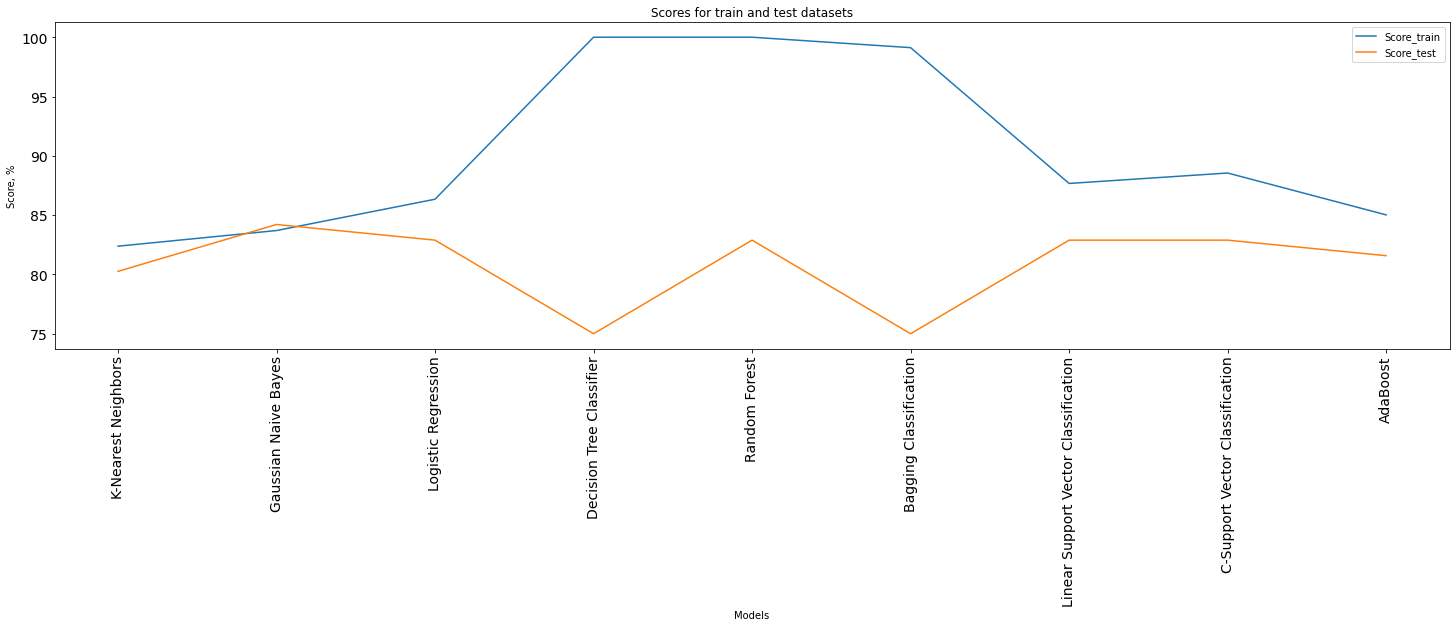

In [197]:
# Plot
plt.figure(figsize=[25,6])
xx = models['Model']
plt.tick_params(labelsize=14)
plt.plot(xx, models['Score_train'], label = 'Score_train')
plt.plot(xx, models['Score_test'], label = 'Score_test')
plt.legend()
plt.title('Scores for train and test datasets')
plt.xlabel('Models')
plt.ylabel('Score, %')
plt.xticks(xx, rotation='vertical')
plt.savefig('graph.png')
plt.show()


The confusion matrix shows 63 correct predictions for and 13 incorrect predictions for the logistic regression algorithm. It shows 57 correct predictions for the decision tree algorithm and 19 incorrect predictions. On the other hand, KNN has predicted 61 correctly and 15 incorrectly. Moreover, Gaussian, Linear and C-Support vector classification algorithms have predicted almost similarly to each other and their accuracies are found to be equal which is 82.89%. Finally, it has shown 62 correct and 14 incorrect predictions for Adaboost algorithm. It can conclude that the models have worked really well and the main part we need to concentrate is the false negative values which is a type2 error as it is more dangerous where the patient has been incorrectly predicted as negative but actually the patient has the heart disease. 

End of analysis